# Nettoyage du jeu de données "Open Food Facts"

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns 
import os
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [3]:
path_to_file = r'/Users/gulsumkapanoglu/Desktop/food/'

In [4]:
factfood=pd.read_csv(path_to_file + 'fr.openfoodfacts.org.products.csv',sep='\t')

In [5]:
factfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [6]:
print(factfood.shape)
factfood.head()

(320772, 162)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
factfood.columns


Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [8]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(factfood.columns)]

In [9]:
col_mapping

['0:code',
 '1:url',
 '2:creator',
 '3:created_t',
 '4:created_datetime',
 '5:last_modified_t',
 '6:last_modified_datetime',
 '7:product_name',
 '8:generic_name',
 '9:quantity',
 '10:packaging',
 '11:packaging_tags',
 '12:brands',
 '13:brands_tags',
 '14:categories',
 '15:categories_tags',
 '16:categories_fr',
 '17:origins',
 '18:origins_tags',
 '19:manufacturing_places',
 '20:manufacturing_places_tags',
 '21:labels',
 '22:labels_tags',
 '23:labels_fr',
 '24:emb_codes',
 '25:emb_codes_tags',
 '26:first_packaging_code_geo',
 '27:cities',
 '28:cities_tags',
 '29:purchase_places',
 '30:stores',
 '31:countries',
 '32:countries_tags',
 '33:countries_fr',
 '34:ingredients_text',
 '35:allergens',
 '36:allergens_fr',
 '37:traces',
 '38:traces_tags',
 '39:traces_fr',
 '40:serving_size',
 '41:no_nutriments',
 '42:additives_n',
 '43:additives',
 '44:additives_tags',
 '45:additives_fr',
 '46:ingredients_from_palm_oil_n',
 '47:ingredients_from_palm_oil',
 '48:ingredients_from_palm_oil_tags',
 '49:i

In [10]:
 df = factfood . iloc [:,  [ 0, 7, 12,14, 31,33,34, 53,54,55, 63, 64, 65,66, 101, 102, 111,112,116,150,158,160 ]]

In [11]:
df

,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,caffeine_100g,nutrition-score-fr_100g,glycemic-index_100g
0,3087,Farine de blé noir,Ferme t'y R'nao,NaN,en:FR,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,US,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",d,NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,NaN,14.0,NaN
2,4559,Peanuts,Torn & Glasser,NaN,US,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",b,NaN,NaN,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,NaN,0.0,NaN
3,16087,Organic Salted Nut Mix,Grizzlies,NaN,US,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",d,NaN,NaN,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,NaN,12.0,NaN
4,16094,Organic Polenta,Bob's Red Mill,NaN,US,États-Unis,Organic polenta,NaN,NaN,NaN,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,Tomato & ricotta,Panzani,NaN,en:RO,Roumanie,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,NaN,US,États-Unis,"Organic peppermint, organic lemon grass, organ...",b,NaN,NaN,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,NaN,0.0,NaN
320769,9970229501521,乐吧泡菜味薯片,乐吧,Potato chips,China,Chine,NaN,NaN,Salty snacks,Appetizers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,Tomates aux Vermicelles,Knorr,NaN,en:FR,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def percentage(value):
    
    return "{0:.1f}%".format(value * 100)

files_description = pd.DataFrame(columns = ["Nb lignes", "Nb colonnes", "Taux remplissage moyen"] ,
                                 
                                 index = ["fr.openfoodfacts.org.products.csv"])

files_description["Nb lignes"] = [
    len(df.index), ]
                                      
files_description["Nb colonnes"] = [
    len(df.columns),]

files_description["Taux remplissage moyen"] = [
    percentage(df.notna().mean().mean()), ]


files_description

,Nb lignes,Nb colonnes,Taux remplissage moyen
fr.openfoodfacts.org.products.csv,320772,22,63.2%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     320749 non-null  object 
 1   product_name             303010 non-null  object 
 2   brands                   292360 non-null  object 
 3   categories               84410 non-null   object 
 4   countries                320492 non-null  object 
 5   countries_fr             320492 non-null  object 
 6   ingredients_text         248962 non-null  object 
 7   nutrition_grade_fr       221210 non-null  object 
 8   pnns_groups_1            91513 non-null   object 
 9   pnns_groups_2            94491 non-null   object 
 10  energy_100g              261113 non-null  float64
 11  energy-from-fat_100g     857 non-null     float64
 12  fat_100g                 243891 non-null  float64
 13  saturated-fat_100g       229554 non-null  float64
 14  carb

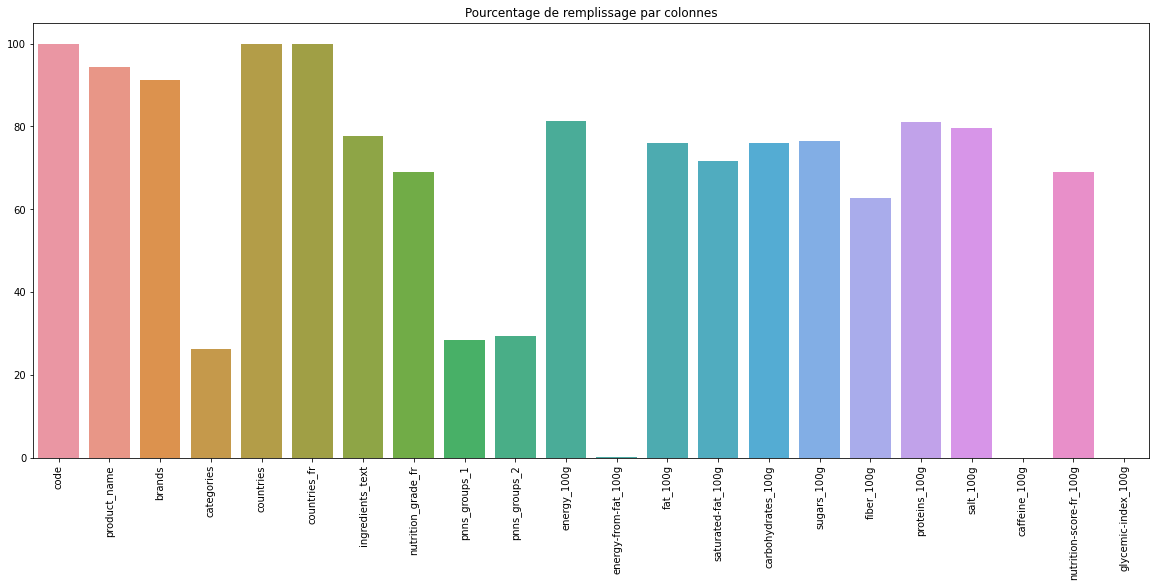

In [13]:
df.info()

nb_row=df.shape[0]

percentage=df.apply(lambda x:(x.notna().sum()/nb_row)*100)


columns=df.columns

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

sns.barplot(x=columns,y=percentage)

plt.title('Pourcentage de remplissage par colonnes')
plt.show()

In [14]:
df.isnull().sum()

code                           23
product_name                17762
brands                      28412
categories                 236362
countries                     280
countries_fr                  280
ingredients_text            71810
nutrition_grade_fr          99562
pnns_groups_1              229259
pnns_groups_2              226281
energy_100g                 59659
energy-from-fat_100g       319915
fat_100g                    76881
saturated-fat_100g          91218
carbohydrates_100g          77184
sugars_100g                 75801
fiber_100g                 119886
proteins_100g               60850
salt_100g                   65262
caffeine_100g              320694
nutrition-score-fr_100g     99562
glycemic-index_100g        320772
dtype: int64

### En dessous de 0,2, l'analyse sera inutile, donc on pourra le supprimer

In [15]:
final_df = df.dropna(thresh=len(df)*0.2, axis='columns')


final_df

,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,3087,Farine de blé noir,Ferme t'y R'nao,NaN,en:FR,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,US,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",d,NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,14.0
2,4559,Peanuts,Torn & Glasser,NaN,US,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",b,NaN,NaN,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.0
3,16087,Organic Salted Nut Mix,Grizzlies,NaN,US,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",d,NaN,NaN,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,12.0
4,16094,Organic Polenta,Bob's Red Mill,NaN,US,États-Unis,Organic polenta,NaN,NaN,NaN,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,Tomato & ricotta,Panzani,NaN,en:RO,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,NaN,US,États-Unis,"Organic peppermint, organic lemon grass, organ...",b,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.0
320769,9970229501521,乐吧泡菜味薯片,乐吧,Potato chips,China,Chine,NaN,NaN,Salty snacks,Appetizers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,Tomates aux Vermicelles,Knorr,NaN,en:FR,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     320749 non-null  object 
 1   product_name             303010 non-null  object 
 2   brands                   292360 non-null  object 
 3   categories               84410 non-null   object 
 4   countries                320492 non-null  object 
 5   countries_fr             320492 non-null  object 
 6   ingredients_text         248962 non-null  object 
 7   nutrition_grade_fr       221210 non-null  object 
 8   pnns_groups_1            91513 non-null   object 
 9   pnns_groups_2            94491 non-null   object 
 10  energy_100g              261113 non-null  float64
 11  fat_100g                 243891 non-null  float64
 12  saturated-fat_100g       229554 non-null  float64
 13  carbohydrates_100g       243588 non-null  float64
 14  suga

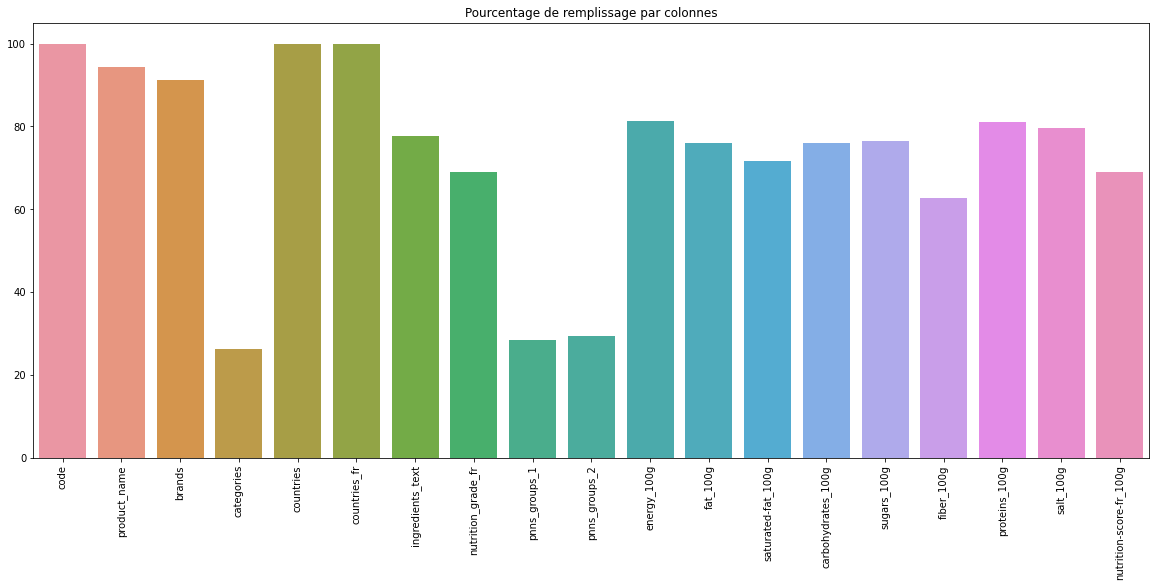

In [16]:
final_df.info()

nb_row=final_df.shape[0]

percentage=final_df.apply(lambda x:(x.notna().sum()/nb_row)*100)


columns=final_df.columns

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

sns.barplot(x=columns,y=percentage)

plt.title('Pourcentage de remplissage par colonnes')
plt.show()

In [17]:
is_france =  final_df['countries_fr']=='France'
print(is_france.head())

0     True
1    False
2    False
3    False
4    False
Name: countries_fr, dtype: bool


In [18]:
final_df = final_df[is_france]
print(final_df .shape)
final_df.head(15)

(94392, 19)


,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,3087,Farine de blé noir,Ferme t'y R'nao,NaN,en:FR,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,Filet de bœuf,NaN,Filet de bœuf,France,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,NaN,NaN,NaN,en:FR,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,Twix x2,NaN,NaN,France,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,lentilles vertes,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",France,France,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,7020254,NaN,A&W,Root bier,France,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,7730009,Biscuits sablés fourrage au cacao,St Michel,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",France,France,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,9336247,NaN,NaN,Bonbons,France,France,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,10090206,Thé de Noël aromatisé orange-cannelle,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...",France,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,10127735,Sirops pour ganache macarons,Alice Délice,"Sirops,Sirops pour ganache",France,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
final_df.isnull().sum()

code                           0
product_name                6994
brands                     11862
categories                 35640
countries                      0
countries_fr                   0
ingredients_text           43900
nutrition_grade_fr         35891
pnns_groups_1              32757
pnns_groups_2              30756
energy_100g                32958
fat_100g                   49801
saturated-fat_100g         35002
carbohydrates_100g         50213
sugars_100g                34904
fiber_100g                 50746
proteins_100g              33208
salt_100g                  34848
nutrition-score-fr_100g    35891
dtype: int64

In [20]:
final_df[final_df.isnull().any(axis= 1)]

,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,3087,Farine de blé noir,Ferme t'y R'nao,NaN,en:FR,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,Filet de bœuf,NaN,Filet de bœuf,France,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,NaN,NaN,NaN,en:FR,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,Twix x2,NaN,NaN,France,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,lentilles vertes,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",France,France,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320760,99044169,Poireaux,NaN,NaN,en:FR,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,Roussette du Bugey (2011),Roussette du Bugey,"Boissons,Boissons alcoolisées,Vins,Vins blancs...",France,France,NaN,NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320764,9918,"Cheese cake thé vert, yuzu",NaN,NaN,en:FR,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,Rillette d'oie,"Sans marque,D.Lambert","Viandes,Produits à tartiner,Charcuteries,Produ...",France,France,"viande d'oie, graisse de canard, épices, sel, ...",NaN,Fish Meat Eggs,Processed meat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Afin de rechercher du gluten dans les produits, la colonne des ingredients_text est importante et ne doit pas contenir de "Nan". Ce pour ça que j'ai supprimer les Nan.

In [21]:
dff = final_df.dropna(subset=['ingredients_text'])

dff.shape

dff

,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
182,5200016,lentilles vertes,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",France,France,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,7730009,Biscuits sablés fourrage au cacao,St Michel,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",France,France,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,10090206,Thé de Noël aromatisé orange-cannelle,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...",France,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,10127735,Sirops pour ganache macarons,Alice Délice,"Sirops,Sirops pour ganache",France,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,40608754,"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,France,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320736,9780201379129,Attiéké,Bonjour Afrique,"Attiéké,Manioc,Semoules de manioc",France,France,semoule de manioc,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320743,9791463741241,Gingembre,Terre exotique,"Aliments et boissons à base de végétaux,Alimen...",France,France,Gingembre,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320758,9900010011557,Miel de Camargue,L. Boulaire,Miels français,France,France,Miel,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,Thé vert Earl grey,Lobodis,thés verts,France,France,"thé vert, arôme naturel bergamote avec autres ...",c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.0254,2.0


In [22]:
dff.isnull().sum()

code                           0
product_name                  52
brands                       147
categories                  1429
countries                      0
countries_fr                   0
ingredients_text               0
nutrition_grade_fr         11963
pnns_groups_1               1442
pnns_groups_2                 20
energy_100g                 9300
fat_100g                    9831
saturated-fat_100g         11175
carbohydrates_100g         10194
sugars_100g                11086
fiber_100g                 25444
proteins_100g               9497
salt_100g                  11044
nutrition-score-fr_100g    11963
dtype: int64

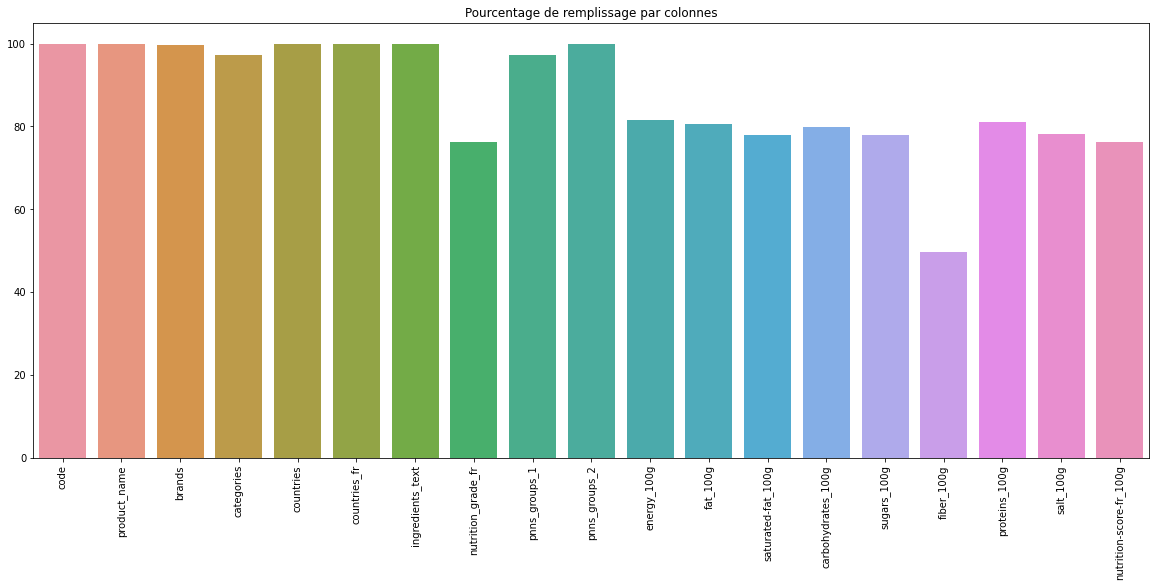

In [23]:
nb_row=dff.shape[0]

percentage=dff.apply(lambda x:(x.notna().sum()/nb_row)*100)

columns=dff.columns

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x=columns,y=percentage)

plt.title('Pourcentage de remplissage par colonnes')
plt.show()

In [24]:
dff

,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
182,5200016,lentilles vertes,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",France,France,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,7730009,Biscuits sablés fourrage au cacao,St Michel,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",France,France,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,10090206,Thé de Noël aromatisé orange-cannelle,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...",France,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,10127735,Sirops pour ganache macarons,Alice Délice,"Sirops,Sirops pour ganache",France,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,40608754,"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,France,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320736,9780201379129,Attiéké,Bonjour Afrique,"Attiéké,Manioc,Semoules de manioc",France,France,semoule de manioc,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320743,9791463741241,Gingembre,Terre exotique,"Aliments et boissons à base de végétaux,Alimen...",France,France,Gingembre,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320758,9900010011557,Miel de Camargue,L. Boulaire,Miels français,France,France,Miel,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,Thé vert Earl grey,Lobodis,thés verts,France,France,"thé vert, arôme naturel bergamote avec autres ...",c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.0254,2.0


In [25]:
dff = dff.replace('$','')

## Crée un colomn pour Gluten

In [26]:
dff['Gluten'] = 0
index_glut = dff['ingredients_text'].str.contains('Gluten|gluten')
dff.loc[index_glut,'Gluten'] = 1

In [27]:
dff.loc[dff.Gluten == 1,'ingredients_text']

509       }ookles syrup INGREDIENTS Wheatflour contains ...
13085     pâte à pizza recouverte de sauce tomate, de fr...
25051     PATISSERIE AU LEVAIN NATUREL.   INGREDIENTS: F...
35814     Farine d'avoine (87%), huile de colza, lait éc...
54697     Légumes 33% (oignons, céleri, carottes, purée ...
                                ...                        
316425    Nouilles: Farine de blé (céréales contenant du...
316859    Ail, eau, sel, sucre, sauce de soja (haricot d...
318124    Glutenfreie Haferflocken, Glutenfreies Crunchy...
318592    Boulgour de blé complet précuit 45,5%, quinoa ...
320113    Blue Agave Syrup, Inulin (Dietary Fibre), Cash...
Name: ingredients_text, Length: 3344, dtype: object

In [28]:
dff.head()

,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten
182,5200016,lentilles vertes,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",France,France,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,St Michel,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",France,France,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...",France,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,Alice Délice,"Sirops,Sirops pour ganache",France,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
226,40608754,"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,France,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,13.0,0


In [29]:
# affichage des entrées multiples dans notre dataset
dff[dff.duplicated()]

,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten


In [30]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50492 entries, 182 to 320765
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     50492 non-null  object 
 1   product_name             50440 non-null  object 
 2   brands                   50345 non-null  object 
 3   categories               49063 non-null  object 
 4   countries                50492 non-null  object 
 5   countries_fr             50492 non-null  object 
 6   ingredients_text         50492 non-null  object 
 7   nutrition_grade_fr       38529 non-null  object 
 8   pnns_groups_1            49050 non-null  object 
 9   pnns_groups_2            50472 non-null  object 
 10  energy_100g              41192 non-null  float64
 11  fat_100g                 40661 non-null  float64
 12  saturated-fat_100g       39317 non-null  float64
 13  carbohydrates_100g       40298 non-null  float64
 14  sugars_100g        

***Suite à cette étape, on a pu réduire le nombre de colonnes à 19***

## Traitement des données aberrantes

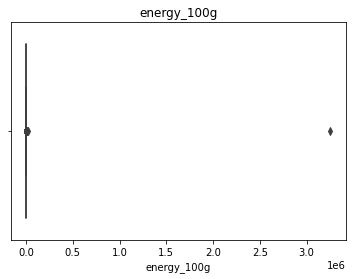

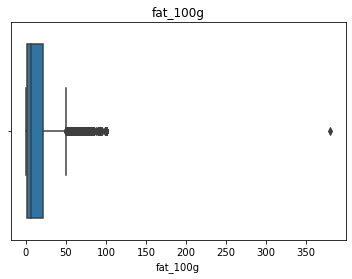

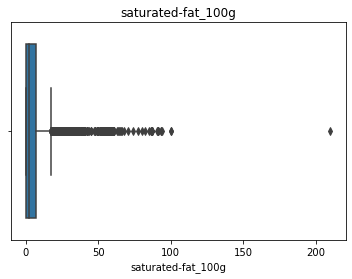

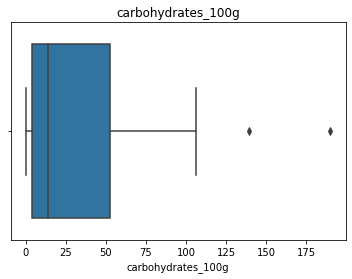

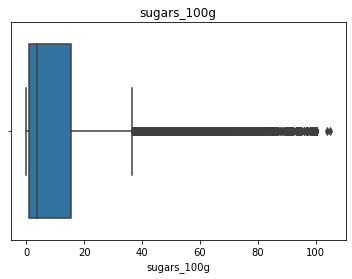

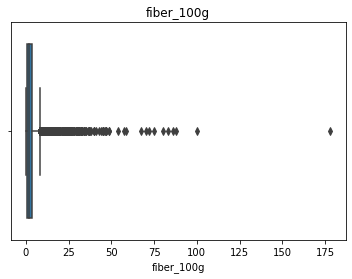

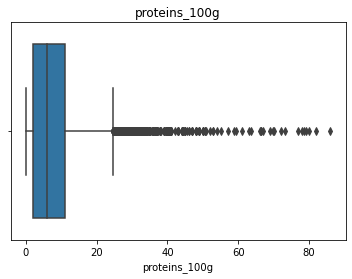

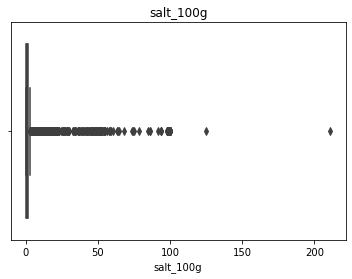

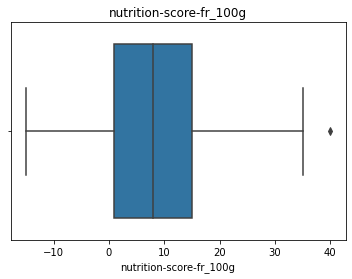

In [31]:
#Création des boîtes à moustache pour détecter les anomalies des variables quantitatives
for var in dff.columns:
    if dff[var].dtypes == 'float64':
        sns.boxplot(x=var, data=dff)
        plt.title(var)
        plt.show()

In [32]:
dff["salt_100g"].describe()

count    39448.000000
mean         1.132575
std          4.126204
min          0.000000
25%          0.085750
50%          0.600000
75%          1.297940
max        211.000000
Name: salt_100g, dtype: float64

Les valeurs nutritionnelles sont pour 100 gr et ne peuvent pas dépasser 100 gr.

Par conséquent, nous supprimerons les lignes avec des valeurs supérieures à 100 g pour les glucides, le sucre, 
les fibres, les protéines et le sel. 
Nous supprimerons également les lignes avec des valeurs inférieures à 0.

Les aliments les plus caloriques peuvent contenir jusqu'à 900 calories.
Par conséquent, en ce qui concerne l'énergie en kcal, 
nous supprimerons les lignes avec des valeurs supérieures à 900 kcal et inférieures à 0.

In [33]:
quntitatives = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', "fiber_100g", "proteins_100g", "salt_100g"]

for col in quntitatives : 
    supprime = dff.loc[(dff[col] < 0) | (dff[col] > 100)].index.to_list()
    dff.drop(index=supprime, inplace=True)
    
quant = ["energy_100g"]

for col in quant : 
    supprime = dff.loc[(dff[col] < 0) | (dff[col] > 900)].index.to_list()
    dff.drop(index=supprime, inplace=True)

In [34]:
dff.shape

(28548, 20)

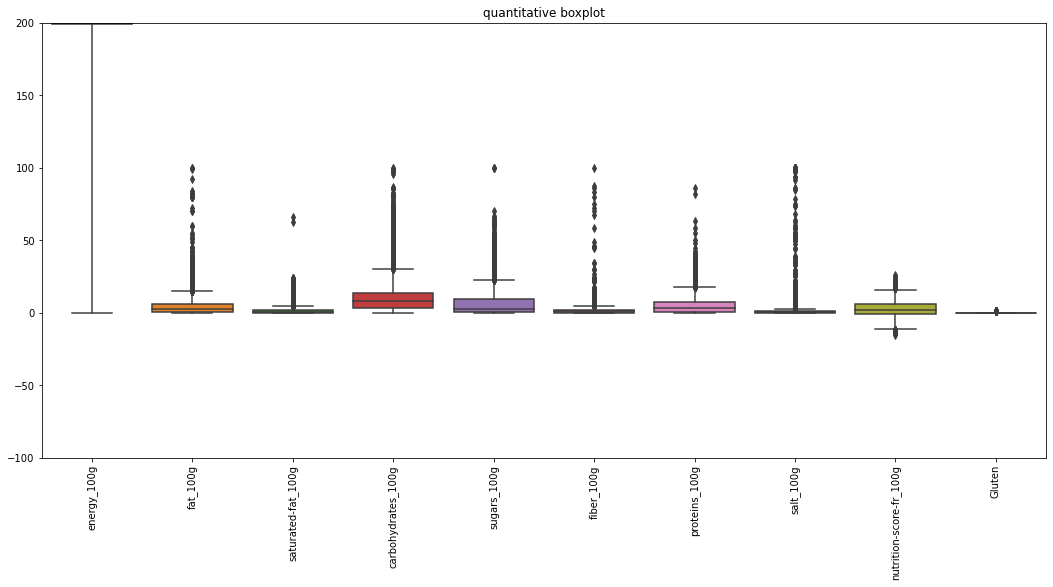

In [35]:
degrees = 90
fig = plt.figure(figsize=(18, 8))
ax = plt.axes()
plt.xticks(rotation=degrees)
ax.set_ylim([-1e2,2e2])
sns.boxplot(data=dff).set_title('quantitative boxplot');

In [36]:
dff.describe() 

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten
count,19248.000000,19196.000000,18246.000000,18913.000000,18402.000000,11971.000000,19161.000000,18431.000000,17917.000000,28548.000000
mean,408.599369,4.258838,1.384817,10.259252,5.865270,1.576106,5.802836,1.126037,2.864486,0.038532
std,239.105933,6.035793,2.194056,10.437229,7.916014,3.061950,6.980000,5.031967,5.829769,0.192479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,199.000000,0.300000,0.100000,3.000000,0.800000,0.200000,0.800000,0.070000,-1.000000,0.000000
50%,390.000000,2.400000,0.600000,8.400000,2.800000,1.000000,3.200000,0.530000,2.000000,0.000000
75%,591.000000,6.200000,2.000000,13.870000,9.500000,2.100000,7.500000,1.016000,6.000000,0.000000
max,900.000000,100.000000,66.000000,100.000000,100.000000,100.000000,86.000000,100.000000,26.000000,1.000000


<AxesSubplot:>

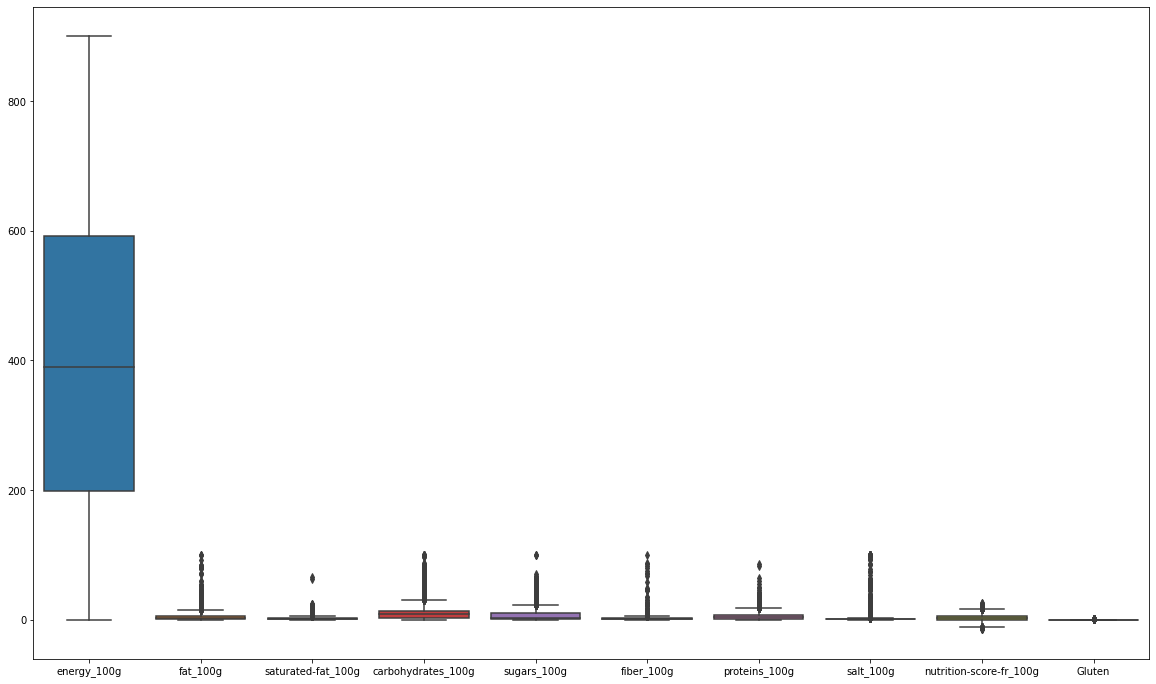

In [37]:
plt.figure(figsize=(20,12));
sns.boxplot(data = dff)

<AxesSubplot:>

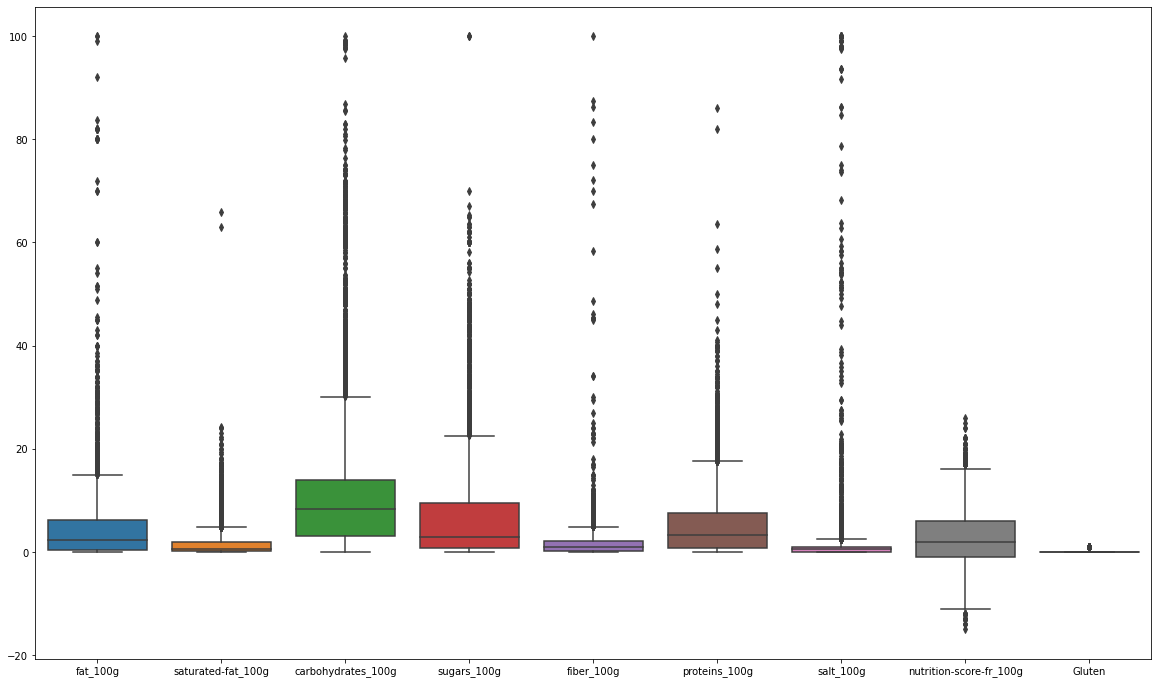

In [38]:
plt.subplots(figsize=(20,12))
sns.boxplot(data=dff.drop('energy_100g', axis=1))

In [39]:
dff.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten
count,19248.000000,19196.000000,18246.000000,18913.000000,18402.000000,11971.000000,19161.000000,18431.000000,17917.000000,28548.000000
mean,408.599369,4.258838,1.384817,10.259252,5.865270,1.576106,5.802836,1.126037,2.864486,0.038532
std,239.105933,6.035793,2.194056,10.437229,7.916014,3.061950,6.980000,5.031967,5.829769,0.192479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,199.000000,0.300000,0.100000,3.000000,0.800000,0.200000,0.800000,0.070000,-1.000000,0.000000
50%,390.000000,2.400000,0.600000,8.400000,2.800000,1.000000,3.200000,0.530000,2.000000,0.000000
75%,591.000000,6.200000,2.000000,13.870000,9.500000,2.100000,7.500000,1.016000,6.000000,0.000000
max,900.000000,100.000000,66.000000,100.000000,100.000000,100.000000,86.000000,100.000000,26.000000,1.000000


In [40]:
dff

,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten
182,5200016,lentilles vertes,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",France,France,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,St Michel,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",France,France,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...",France,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,Alice Délice,"Sirops,Sirops pour ganache",France,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
226,40608754,"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,France,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320736,9780201379129,Attiéké,Bonjour Afrique,"Attiéké,Manioc,Semoules de manioc",France,France,semoule de manioc,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320743,9791463741241,Gingembre,Terre exotique,"Aliments et boissons à base de végétaux,Alimen...",France,France,Gingembre,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320758,9900010011557,Miel de Camargue,L. Boulaire,Miels français,France,France,Miel,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320763,99111250,Thé vert Earl grey,Lobodis,thés verts,France,France,"thé vert, arôme naturel bergamote avec autres ...",c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.0254,2.0,0


## Traitement des valeurs manquantes

In [41]:
dff

,code,product_name,brands,categories,countries,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten
182,5200016,lentilles vertes,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",France,France,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,St Michel,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",France,France,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...",France,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,Alice Délice,"Sirops,Sirops pour ganache",France,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
226,40608754,"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,France,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320736,9780201379129,Attiéké,Bonjour Afrique,"Attiéké,Manioc,Semoules de manioc",France,France,semoule de manioc,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320743,9791463741241,Gingembre,Terre exotique,"Aliments et boissons à base de végétaux,Alimen...",France,France,Gingembre,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320758,9900010011557,Miel de Camargue,L. Boulaire,Miels français,France,France,Miel,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320763,99111250,Thé vert Earl grey,Lobodis,thés verts,France,France,"thé vert, arôme naturel bergamote avec autres ...",c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.0254,2.0,0


In [42]:
#On supprime la colonne countries 
dff.drop(["countries", "countries_fr"], axis=1, inplace=True)

In [43]:
dff

,code,product_name,brands,categories,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten
182,5200016,lentilles vertes,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,St Michel,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés","Sucre, farine de _Blé_, graisse et huiles végé...",NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...","Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,Alice Délice,"Sirops,Sirops pour ganache","Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
226,40608754,"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320736,9780201379129,Attiéké,Bonjour Afrique,"Attiéké,Manioc,Semoules de manioc",semoule de manioc,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320743,9791463741241,Gingembre,Terre exotique,"Aliments et boissons à base de végétaux,Alimen...",Gingembre,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320758,9900010011557,Miel de Camargue,L. Boulaire,Miels français,Miel,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320763,99111250,Thé vert Earl grey,Lobodis,thés verts,"thé vert, arôme naturel bergamote avec autres ...",c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.0254,2.0,0


In [44]:
dff.reset_index(drop=True,inplace=True)

In [45]:
dff.head()

,code,product_name,brands,categories,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten
0,5200016,lentilles vertes,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,7730009,Biscuits sablés fourrage au cacao,St Michel,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés","Sucre, farine de _Blé_, graisse et huiles végé...",NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,10090206,Thé de Noël aromatisé orange-cannelle,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...","Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10127735,Sirops pour ganache macarons,Alice Délice,"Sirops,Sirops pour ganache","Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,40608754,"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,13.0,0


In [46]:
dff.isnull().sum()

code                           0
product_name                  39
brands                       130
categories                   693
ingredients_text               0
nutrition_grade_fr         10631
pnns_groups_1               1410
pnns_groups_2                  9
energy_100g                 9300
fat_100g                    9352
saturated-fat_100g         10302
carbohydrates_100g          9635
sugars_100g                10146
fiber_100g                 16577
proteins_100g               9387
salt_100g                  10117
nutrition-score-fr_100g    10631
Gluten                         0
dtype: int64

In [47]:
dff.shape

(28548, 18)

In [48]:
cols = ["product_name","nutrition_grade_fr","brands","pnns_groups_1","categories"]
for col in cols:
    dff=dff.drop(dff[dff[col].isnull()].index)
dff.reset_index(drop=True,inplace=True)

## Imputation des données manquantes

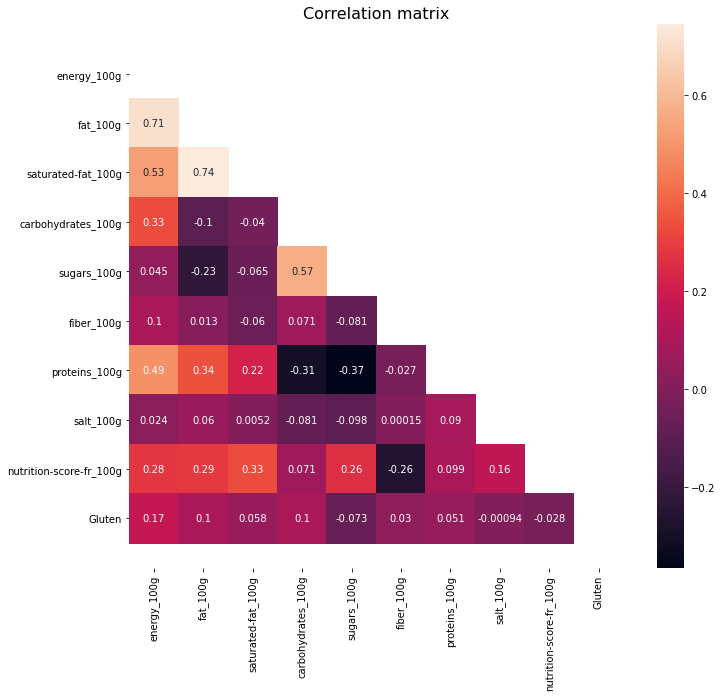

In [49]:
#Heatmap
corr_matrix=dff.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, square=True,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation matrix',fontsize=16)
plt.show()

***On remarque que forte corrélation de  entre: en plus de 0.5 *** 

-fat_100g et energy_100g

-saturated-fat_100g et energy_100g

-saturated-fat_100g et fat_100g

-sugars_100g et carbohydrates_100g

#Nous allons maintenant diviser les nutriscores en nutrigrades
Source = https://quoidansmonassiette.fr/etiquetage-nutritionnel-nutri-score-5-c-vainqueur-de-la-guerre-des-logos-nutritionnels/
Le Nutri-score va donc de -15 à 40. Voici les correspondances couleurs : 

-15 à -2 : vert         
-1 à 3 : vert clair     
4 à 11 : jaune       
12 à 16 : orange  
Plus de 17 : rouge

In [50]:
def nutrigrade(score):
    if score<-15:
        grade ='NaN'
    elif score <= -1:
         grade ='a'
    elif score <=2:
         grade ='b'
    elif score<=10:
         grade ='c'
    elif score<=18:
         grade ='d'
    elif score<=40:
         grade ='e'
    else :
        grade='NaN'
    return grade
        
# nutrigrade(24)
dff['nutriscore_grade']=dff['nutrition-score-fr_100g'].apply(nutrigrade)

In [51]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17318 entries, 0 to 17317
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     17318 non-null  object 
 1   product_name             17318 non-null  object 
 2   brands                   17318 non-null  object 
 3   categories               17318 non-null  object 
 4   ingredients_text         17318 non-null  object 
 5   nutrition_grade_fr       17318 non-null  object 
 6   pnns_groups_1            17318 non-null  object 
 7   pnns_groups_2            17318 non-null  object 
 8   energy_100g              17266 non-null  float64
 9   fat_100g                 16979 non-null  float64
 10  saturated-fat_100g       17266 non-null  float64
 11  carbohydrates_100g       17003 non-null  float64
 12  sugars_100g              17266 non-null  float64
 13  fiber_100g               11200 non-null  float64
 14  proteins_100g         

<AxesSubplot:>

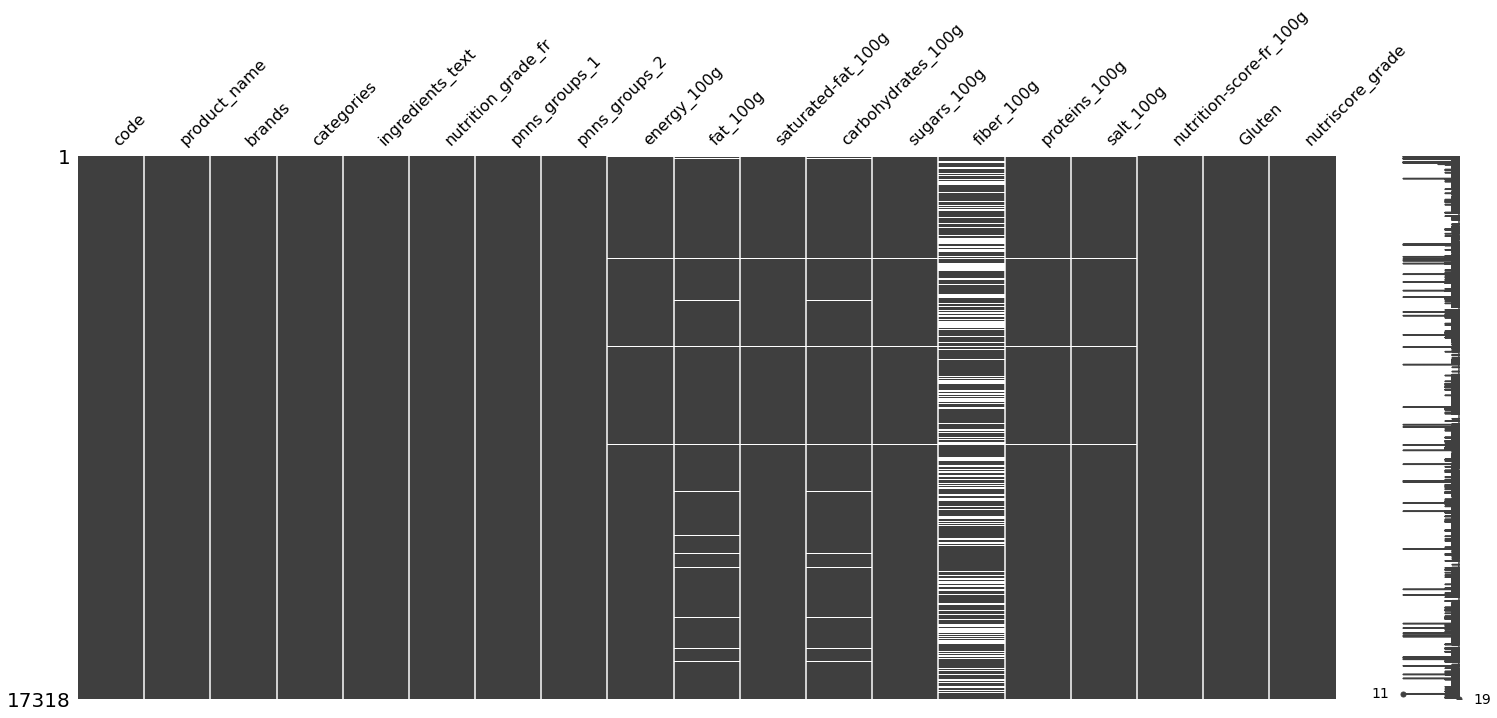

In [52]:
%matplotlib inline
msno.matrix(dff)

## Imputation par KNN

In [53]:
cols = list(dff.select_dtypes(include=['category']).columns)
filling=[]
for col in cols:
    print(col)
    print(len(dff[col].unique().to_list()))
    if len(dff[col].unique().to_list())<100:
        filling.append(col)
filling


[]

In [54]:
fooddummies=pd.get_dummies(dff,columns=filling)
numcol = list(fooddummies.select_dtypes(include=['uint8','float']).columns)
numcol


['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

In [55]:
from sklearn.impute import KNNImputer
i0=0
while i0<dff.shape[0]:
    print('**')
    i1=i0+round(dff.shape[0]/5)   
    if i1>dff.shape[0]:
        i1=dff.shape[0]
    print(i0)
    print(i1)
    imputer = KNNImputer(n_neighbors=3)
    imputed = imputer.fit_transform(fooddummies.loc[i0:i1,numcol])
    fooddummies.loc[i0:i1,numcol]=imputed
    i0=i1 


**
0
3464
**
3464
6928
**
6928
10392
**
10392
13856
**
13856
17318


In [56]:
tonumeric_cols= list(dff.select_dtypes(include=['float']).columns)
tonumeric_cols

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

In [57]:
dff[tonumeric_cols]=fooddummies[tonumeric_cols]

<AxesSubplot:>

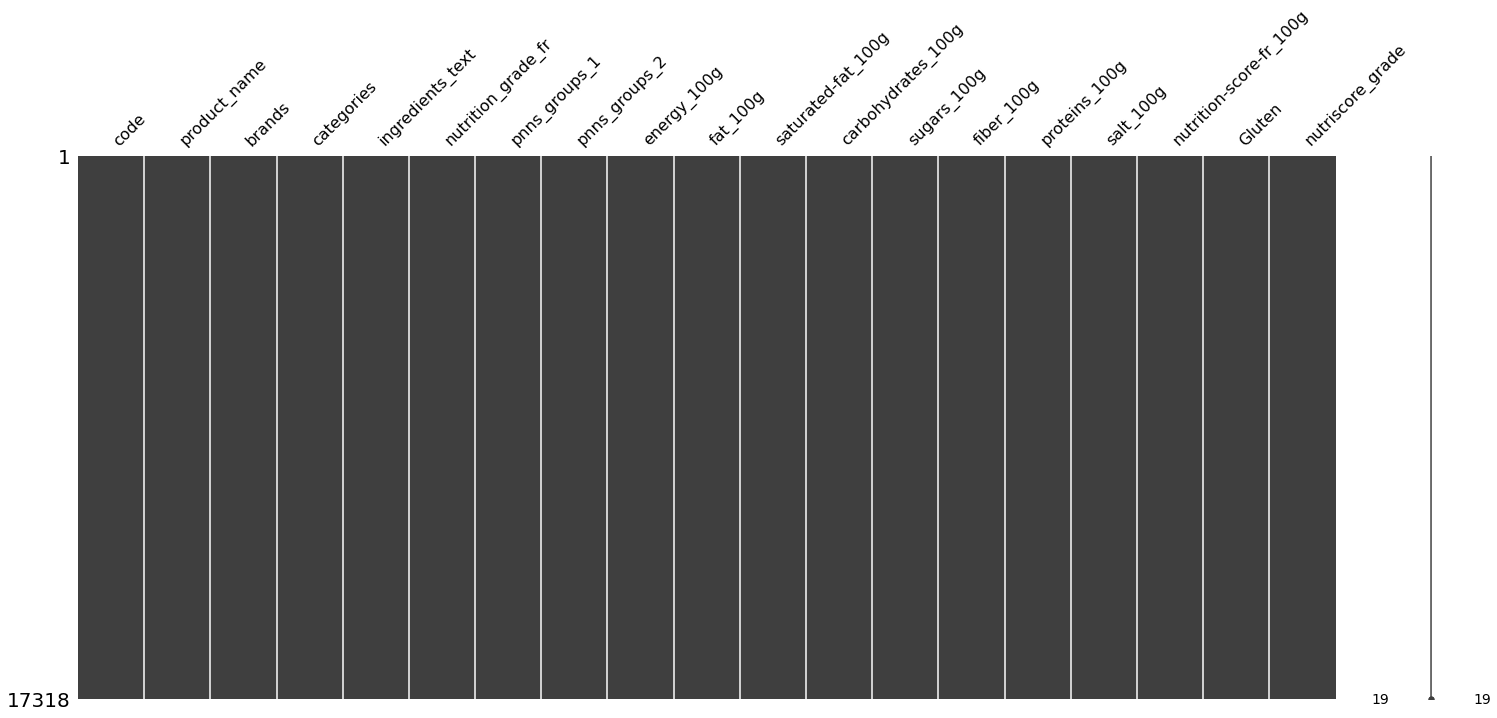

In [58]:
%matplotlib inline
msno.matrix(dff)

Finalement, on a gardé 19 colonnes et 17318 lignes

In [59]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17318 entries, 0 to 17317
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     17318 non-null  object 
 1   product_name             17318 non-null  object 
 2   brands                   17318 non-null  object 
 3   categories               17318 non-null  object 
 4   ingredients_text         17318 non-null  object 
 5   nutrition_grade_fr       17318 non-null  object 
 6   pnns_groups_1            17318 non-null  object 
 7   pnns_groups_2            17318 non-null  object 
 8   energy_100g              17318 non-null  float64
 9   fat_100g                 17318 non-null  float64
 10  saturated-fat_100g       17318 non-null  float64
 11  carbohydrates_100g       17318 non-null  float64
 12  sugars_100g              17318 non-null  float64
 13  fiber_100g               17318 non-null  float64
 14  proteins_100g         

In [60]:
dff.head()

,code,product_name,brands,categories,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten,nutriscore_grade
0,40608754,"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.000,0.0,0.0254,13.0,0,d
1,87177756,7Up,"7Up,Pepsico","Sodas au citron,Boissons sucrées","Eau gazéifiée, sucre, acidifiants (acide citri...",e,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.000,0.0,0.1000,13.0,0,d
2,31858,Pur Soup' Velouté de légumes,Liebig,"Aliments et boissons à base de végétaux,Alimen...","eau, légumes 38% (jus de tomates à base de con...",b,Fruits and vegetables,Soups,188.0,2.100000,0.7,5.300000,2.4,0.800,0.8,0.7500,2.0,0,b
3,16229001919,Lait de coco,Aroy d,Laits de coco,"Extrait de noix de coco 60%, eau, emulsifiant ...",d,Beverages,Non-sugared beverages,774.0,14.066667,17.0,10.233333,2.0,0.000,1.6,0.0500,12.0,0,d
4,16229004507,Foco basil seed drink,Foco,"Beverages,Carbonated drinks,Sodas,Sugared beve...","Eau, graines de basilic, sucre (10%), arôme ar...",e,Beverages,Sweetened beverages,266.0,0.000000,0.0,15.800000,13.3,0.303,0.0,0.0231,18.0,0,d


In [61]:
#save the file to csv
dff.to_csv('dernière_version.csv',sep=',',index=False) 